In [322]:
# utilities
import re
import numpy as np
import pandas as pd
import string
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

## Sarcasm Dataset Analysis

In [52]:
df_sarcasm = pd.read_csv('sarcasm_dataset.csv')

In [53]:
df_sarcasm

,Unnamed: 0,tweet,sarcastic,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
0,0,The only thing I got from college is a caffein...,1,0.0,1.0,0.0,0.0,0.0,0.0
1,1,I love it when professors draw a big question ...,1,1.0,0.0,0.0,0.0,0.0,0.0
2,2,Remember the hundred emails from companies whe...,1,0.0,1.0,0.0,0.0,0.0,0.0
3,3,Today my pop-pop told me I was not “forced” to...,1,1.0,0.0,0.0,0.0,0.0,0.0
4,4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3463,3463,The population spike in Chicago in 9 months is...,0,NaN,NaN,NaN,NaN,NaN,NaN
3464,3464,You'd think in the second to last English clas...,0,NaN,NaN,NaN,NaN,NaN,NaN
3465,3465,I’m finally surfacing after a holiday to Scotl...,0,NaN,NaN,NaN,NaN,NaN,NaN
3466,3466,Couldn't be prouder today. Well done to every ...,0,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
df_sarcasm = df_sarcasm[['tweet', 'sarcastic']]

In [57]:
df_sarcasm = df_sarcasm[df_sarcasm['sarcastic'] == 1]

In [58]:
df_sarcasm

,tweet,sarcastic
0,The only thing I got from college is a caffein...,1
1,I love it when professors draw a big question ...,1
2,Remember the hundred emails from companies whe...,1
3,Today my pop-pop told me I was not “forced” to...,1
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1
...,...,...
862,yo @claires do yall do hysterectomies?,1
863,@JacobWohlReport Do I need to aquire a wife be...,1
864,I get a lot of boy who cried wolf vibes from t...,1
865,Update: holding hands with your mom and walkin...,1


In [70]:
# rename the 'sarcastic' column to 'sentiment'
df_sarcasm = df_sarcasm.rename(columns={'sarcastic': 'sentiment'})

# replace all values in the 'sentiment' column from 1 to 3 to account for other sentiment labels
df_sarcasm['sentiment'] = df_sarcasm['sentiment'].replace({1: 3})

In [71]:
df_sarcasm

,tweet,sentiment
0,The only thing I got from college is a caffein...,3
1,I love it when professors draw a big question ...,3
2,Remember the hundred emails from companies whe...,3
3,Today my pop-pop told me I was not “forced” to...,3
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,3
...,...,...
862,yo @claires do yall do hysterectomies?,3
863,@JacobWohlReport Do I need to aquire a wife be...,3
864,I get a lot of boy who cried wolf vibes from t...,3
865,Update: holding hands with your mom and walkin...,3


## Sentiment Dataset Analysis

In [59]:
df_sentiment = pd.read_csv('sentiment_dataset.csv')

In [60]:
df_sentiment

,Unnamed: 0,tweet,sentiment
0,0,is upset that he can't update his Facebook by ...,0.0
1,1,@Kenichan I dived many times for the ball. Man...,0.0
2,2,my whole body feels itchy and like its on fire,0.0
3,3,"@nationwideclass no, it's not behaving at all....",0.0
4,4,@Kwesidei not the whole crew,0.0
...,...,...,...
3142398,3142398,"With ad revenues falling, what’s the impact on...",2.0
3142399,3142399,RT @KelvinSCWong: Well another point to add to...,2.0
3142400,3142400,$ITOX working on a contract with a fortune 500...,2.0
3142401,3142401,"$DIS it could break the 120 pin, then 125&gt; ...",2.0


In [61]:
df_sentiment = df_sentiment.drop(df_sentiment.columns[0], axis=1)
df_sentiment = df_sentiment.dropna(subset=['sentiment'])

In [62]:
df_sentiment

,tweet,sentiment
0,is upset that he can't update his Facebook by ...,0.0
1,@Kenichan I dived many times for the ball. Man...,0.0
2,my whole body feels itchy and like its on fire,0.0
3,"@nationwideclass no, it's not behaving at all....",0.0
4,@Kwesidei not the whole crew,0.0
...,...,...
3142398,"With ad revenues falling, what’s the impact on...",2.0
3142399,RT @KelvinSCWong: Well another point to add to...,2.0
3142400,$ITOX working on a contract with a fortune 500...,2.0
3142401,"$DIS it could break the 120 pin, then 125&gt; ...",2.0


In [63]:
df_sentiment[df_sentiment.columns[1]] = df_sentiment[df_sentiment.columns[1]].astype(int)

In [64]:
df_sentiment.sample(20)

,tweet,sentiment
1332530,Sims 3 in 2 days YEAHHHH baby!,1
236939,Came outside but the sun keeps going in,0
1251498,@monikala nah it was actually a really good pi...,1
1595580,Watching fresh prince &amp; painting my nailsss,1
747972,@hotshot1 Leeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee I ...,0
562141,its way too early. i dont want to have an engl...,0
2291902,sorry to hear about your mom slash,0
2370634,so its blowing budget day,1
2487103,sureee emma just make people think that haha y...,1
425443,just made a huge mess of things because she ne...,0


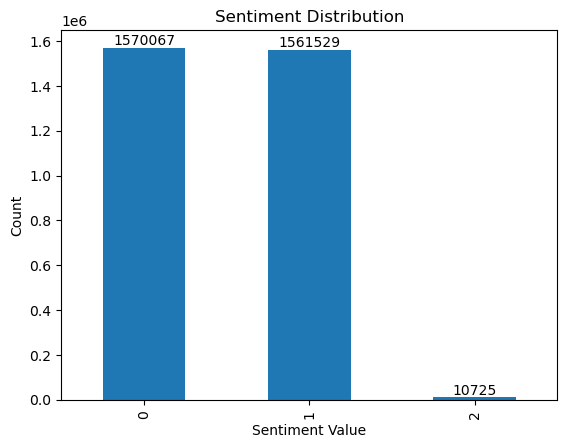

In [65]:
sentiment_counts = df_sentiment['sentiment'].value_counts()
b1 = sentiment_counts.plot(kind='bar')
plt.xlabel('Sentiment Value')
plt.ylabel('Count')
plt.title('Sentiment Distribution')

for i, count in enumerate(sentiment_counts):
    b1.text(i, count + 0.1, str(count), ha='center', va='bottom')
    
plt.show()

In [90]:
df_0 = df_sentiment[df_sentiment['sentiment'] == 0]
df_1 = df_sentiment[df_sentiment['sentiment'] == 1]
df_2 = df_sentiment[df_sentiment['sentiment'] == 2]

# randomly sample rows from df_0 and df_1 based on the count for sarcastic comments from the other dataset
# the goal is to make dataset more balanced and faster to process
sampled_df_0 = df_0.sample(n=867, replace=False, random_state=42)
sampled_df_1 = df_1.sample(n=867, replace=False, random_state=42)
sampled_df_2 = df_2.sample(n=867, replace=False, random_state=42)

sampled_df = pd.concat([sampled_df_0, sampled_df_1, sampled_df_2])
sampled_df = sampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [91]:
sampled_df

,tweet,sentiment
0,last day of our swimming classes last semester...,1
1,"just watched devil wears prada, and i want to ...",0
2,so nice to get back from work enjoy the last o...,0
3,$SPX Minor Breakout Pattern \nDaily appearance...,2
4,"would vote for himself, but unfortunatelly tha...",1
...,...,...
2596,just watched kellie pickler on ellen! aw man f...,1
2597,getting ready for work more day after this,1
2598,im going driving today! at 6:15-9:15 with MONI...,1
2599,heading for work. So happy that i have only on...,1


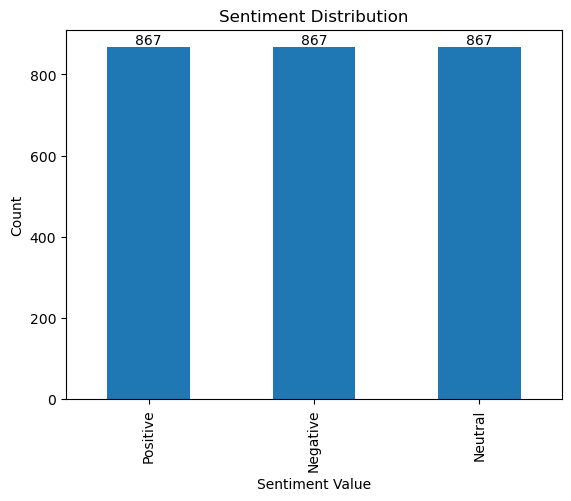

In [92]:
sentiment_counts = sampled_df['sentiment'].value_counts()
sentiment_counts.index = sentiment_counts.index.map({0: 'Negative', 1: 'Positive', 2: 'Neutral'})
b2 = sentiment_counts.plot(kind='bar')
plt.xlabel('Sentiment Value')
plt.ylabel('Count')
plt.title('Sentiment Distribution')

for i, count in enumerate(sentiment_counts):
    b2.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()

In [93]:
sampled_df.sample(20)

,tweet,sentiment
1374,RT @DeItaOne: COVID-19 VACCINE FROM PFIZER AND...,2
2556,@YESandME did he leave us?,0
148,RT @RichLightShed: Over 25 million @HBO subscr...,2
2130,Chillin,1
1808,@Splinteredmind correlation is good enough for...,1
1601,Just checking through the stores inventory to ...,1
520,no idea what i have i think it s ei i m sad now,0
734,heck yea bbq . i'm supposed to be studying my...,0
931,i m glad it can bring you so much joy ha ha ha...,1
617,i seem to be having twitter api problems,0


## Combine Datasets

In [98]:
dataset = pd.concat([sampled_df, df_sarcasm], ignore_index=True)

In [99]:
len(dataset)

3468

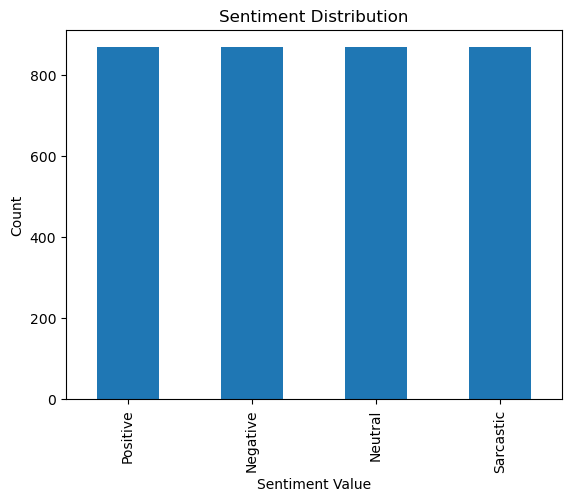

In [100]:
counts = dataset['sentiment'].value_counts()
counts.index = counts.index.map({0: 'Negative', 1: 'Positive', 2: 'Neutral', 3: 'Sarcastic'})
b3 = counts.plot(kind='bar')
plt.xlabel('Sentiment Value')
plt.ylabel('Count')
plt.title('Sentiment Distribution')

for i, count in enumerate(counts):
    b2.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()

In [101]:
dataset.sample(30)

,tweet,sentiment
485,very bored at home,0
3058,you know what’s a novel concept? rapists and s...,3
1666,heh i don t think i ll get a contract one not ...,0
1293,My little guy just said &quot;Daddy!&quot; He'...,1
59,what happened to where did she go,0
2862,Men will literally fake an injury on the footb...,3
1561,If you sitting there wanting to short everythi...,2
3212,this time tomorrow i'll be dying at school Can...,3
481,Aaaah so scared! F1's actually split in two! ...,0
480,@kyee Sold full position in $WM yesterday and ...,2


## Preprocess Data

In [103]:
# convert to lowercase
dataset['tweet'] = dataset['tweet'].str.lower()
dataset['tweet'].head()

0    last day of our swimming classes last semester...
1    just watched devil wears prada, and i want to ...
2    so nice to get back from work enjoy the last o...
3    $spx minor breakout pattern \ndaily appearance...
4    would vote for himself, but unfortunatelly tha...
Name: tweet, dtype: object

In [114]:
# remove stopwords
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

STOPWORDS = set(stopwordlist)

def remove_stopwords(text):
    words = str(text).split()
    filtered_words = [word for word in words if word not in STOPWORDS]
    return " ".join(filtered_words)

dataset['tweet'] = dataset['tweet'].apply(remove_stopwords)
dataset['tweet'].head()

0    last day swimming classes last semester haha m...
1    watched devil wears prada want live new york c...
2    nice get back work enjoy last sun revision oh ...
3    spx minor breakout pattern daily appearances s...
4    would vote but unfortunatelly name didnt pop l...
Name: tweet, dtype: object

In [120]:
# remove punctuation
punctuations_list = string.punctuation

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

dataset['tweet'] = dataset['tweet'].apply(remove_punctuations)
dataset['tweet'].head()

0    last day swimming classes last semester haha m...
1    watched devil wears prada want live new york c...
2    nice get back work enjoy last sun revision oh ...
3    spx minor breakout pattern daily appearances s...
4    would vote but unfortunatelly name didnt pop l...
Name: tweet, dtype: object

In [117]:
# remove urls
def remove_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

dataset['tweet'] = dataset['tweet'].apply(remove_URLs)
dataset['tweet'].head()

0    last day swimming classes last semester haha m...
1    watched devil wears prada want live new york c...
2    nice get back work enjoy last sun revision oh ...
3    spx minor breakout pattern daily appearances s...
4    would vote but unfortunatelly name didnt pop l...
Name: tweet, dtype: object

In [118]:
# remove numbers
def remove_numbers(data):
    return re.sub('[0-9]+', '', data)

dataset['tweet'] = dataset['tweet'].apply(remove_numbers)
dataset['tweet'].head()

0    last day swimming classes last semester haha m...
1    watched devil wears prada want live new york c...
2    nice get back work enjoy last sun revision oh ...
3    spx minor breakout pattern daily appearances s...
4    would vote but unfortunatelly name didnt pop l...
Name: tweet, dtype: object

In [122]:
# tokenization
tokenizer = RegexpTokenizer(r'\w+')
dataset['tweet'] = dataset['tweet'].astype(str)
dataset['tweet'] = dataset['tweet'].apply(tokenizer.tokenize)
dataset['tweet'].head()

0    [last, day, swimming, classes, last, semester,...
1    [watched, devil, wears, prada, want, live, new...
2    [nice, get, back, work, enjoy, last, sun, revi...
3    [spx, minor, breakout, pattern, daily, appeara...
4    [would, vote, but, unfortunatelly, name, didnt...
Name: tweet, dtype: object

In [131]:
# stemming
st = nltk.PorterStemmer()
def stemming_on_text(data):
    return[st.stem(word) for word in data]

dataset['tweet']= dataset['tweet'].apply(stemming_on_text)
dataset['tweet'].head()

0    [last, day, swim, class, last, semest, haha, m...
1    [watch, devil, wear, prada, want, live, new, y...
2    [nice, get, back, work, enjoy, last, sun, revi...
3    [spx, minor, breakout, pattern, daili, appear,...
4    [would, vote, but, unfortunatelli, name, didnt...
Name: tweet, dtype: object

In [133]:
# lemmatization
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    return[lm.lemmatize(word) for word in data]

dataset['tweet'] = dataset['tweet'].apply(lemmatizer_on_text)
dataset['tweet'].head()

0    [last, day, swim, class, last, semest, haha, m...
1    [watch, devil, wear, prada, want, live, new, y...
2    [nice, get, back, work, enjoy, last, sun, revi...
3    [spx, minor, breakout, pattern, daili, appear,...
4    [would, vote, but, unfortunatelli, name, didnt...
Name: tweet, dtype: object

## Transform Dataset Using TF-IDF Vectorizer

In [137]:
X=dataset['tweet']
y=dataset['sentiment']

In [142]:
X

0       [last, day, swim, class, last, semest, haha, m...
1       [watch, devil, wear, prada, want, live, new, y...
2       [nice, get, back, work, enjoy, last, sun, revi...
3       [spx, minor, breakout, pattern, daili, appear,...
4       [would, vote, but, unfortunatelli, name, didnt...
                              ...                        
3463                      [yo, clair, yall, hysterectomi]
3464    [jacobwohlreport, need, aquir, wife, happen, a...
3465    [get, lot, boy, cri, wolf, vibe, red, cross, e...
3466    [updat, hold, hand, mom, walk, around, campu, ...
3467    [might, rubbish, drive, le, stellar, career, b...
Name: tweet, Length: 3468, dtype: object

In [143]:
y

0       1
1       0
2       0
3       2
4       1
       ..
3463    3
3464    3
3465    3
3466    3
3467    3
Name: sentiment, Length: 3468, dtype: int64

In [183]:
# separating 80% data for training data and 20% faor testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =26105111)

In [184]:
# convert to strings
X_train = [' '.join(map(str, sublist)).lower() for sublist in X_train]
X_test = [' '.join(map(str, sublist)).lower() for sublist in X_test]

In [185]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=500000)
vectorizer.fit(X_train)

print('No. of feature_words:', len(vectorizer.get_feature_names()))

No. of feature_words: 29015


/Users/tonizeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [186]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

## Model Testing

In [305]:
def model_Evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

### Model-1 Gaussian Naive Bayes Classifier

In [347]:
class_weights = {0: 1, 1: 1, 2: 1, 3: 2}

sample_weights = np.array([class_weights[y] for y in y_train])
GNBmodel = GaussianNB()
GNBmodel.fit(X_train.toarray(), y_train, sample_weight=sample_weights)
print("Gaussian Naive Bayes:")
model_Evaluate(GNBmodel, X_test.toarray(), y_test)

Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.49      0.55      0.52       188
           1       0.47      0.39      0.42       181
           2       0.83      0.80      0.82       169
           3       0.44      0.49      0.46       156

    accuracy                           0.55       694
   macro avg       0.56      0.56      0.56       694
weighted avg       0.56      0.55      0.55       694



### Model-2 Multinomial Naive Bayes Classifier

In [352]:
class_weights = {0: 1, 1: 1, 2: 1, 3: 2}  

class_counts = [sum(y_train == i) for i in range(4)]  
total_samples = len(y_train)
class_proportions = [count / total_samples for count in class_counts]

weighted_proportions = [class_proportions[i] * class_weights[i] for i in range(4)]

MNBmodel = MultinomialNB(class_prior=weighted_proportions)

MNBmodel.fit(X_train, y_train)

print("Multinomial Naive Bayes:")
model_Evaluate(MNBmodel, X_test, y_test)

Multinomial Naive Bayes:
              precision    recall  f1-score   support

           0       0.73      0.19      0.30       188
           1       0.87      0.11      0.20       181
           2       1.00      0.64      0.78       169
           3       0.30      0.97      0.45       156

    accuracy                           0.46       694
   macro avg       0.72      0.48      0.43       694
weighted avg       0.73      0.46      0.42       694



### Model-3 KNN

In [358]:
class_weights = {0: 1, 1: 1, 2: 1, 3: 2} 

k = 30  
KNNmodel = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean', metric_params={'w': class_weights})
KNNmodel.fit(X_train, y_train)
print("K-Nearest Neighbors (KNN):")
model_Evaluate(KNNmodel, X_test, y_test)

K-Nearest Neighbors (KNN):
              precision    recall  f1-score   support

           0       0.51      0.64      0.57       188
           1       0.55      0.49      0.52       181
           2       0.84      0.83      0.84       169
           3       0.52      0.43      0.47       156

    accuracy                           0.60       694
   macro avg       0.61      0.60      0.60       694
weighted avg       0.60      0.60      0.60       694



### Model-4 Logistic Regression

In [359]:
class_weights = {0: 1, 1: 1, 2: 1, 3: 2}  

LRmodel = LogisticRegression(class_weight=class_weights)
LRmodel.fit(X_train, y_train)
y_pred = LRmodel.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.47      0.54       188
           1       0.69      0.29      0.41       181
           2       0.97      0.78      0.86       169
           3       0.40      0.88      0.55       156

    accuracy                           0.59       694
   macro avg       0.68      0.60      0.59       694
weighted avg       0.68      0.59      0.59       694



### Model-5 SVM

In [360]:
class_weights = {0: 1, 1: 1, 2: 1, 3: 2}  

sample_weights = np.array([class_weights[y] for y in y_train])
svmModel = SVC(kernel='linear', class_weight=class_weights)
svmModel.fit(X_train, y_train, sample_weight=sample_weights)
y_pred = svmModel.predict(X_test)
print("SVM")
print(classification_report(y_test, y_pred))

SVM
              precision    recall  f1-score   support

           0       0.55      0.61      0.58       188
           1       0.56      0.42      0.48       181
           2       0.92      0.83      0.88       169
           3       0.49      0.62      0.55       156

    accuracy                           0.62       694
   macro avg       0.63      0.62      0.62       694
weighted avg       0.63      0.62      0.62       694



### Model-6 Random Forest Classifier

In [361]:
class_weights = {0: 1, 1: 1, 2: 1, 3: 2}  

rfModel = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights)
rfModel.fit(X_train, y_train)
print("Random Forest Classifier")
model_Evaluate(rfModel, X_test, y_test)

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.48      0.64      0.55       188
           1       0.48      0.56      0.52       181
           2       0.94      0.78      0.85       169
           3       0.62      0.37      0.46       156

    accuracy                           0.59       694
   macro avg       0.63      0.59      0.59       694
weighted avg       0.62      0.59      0.59       694

